<a href="https://colab.research.google.com/github/Andrade-Douglas/Data-Science/blob/master/basketball_reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basketball Reference**

Fonte: https://medium.com/data-hackers/como-fazer-web-scraping-em-python-23c9d465a37f

In [0]:
import pandas as pd
import requests
from bs4 import BeautifulSoup 

In [0]:
req = requests.get('https://www.basketball-reference.com/leagues/NBA_2018_totals.html')

In [0]:
if req.status_code == 200:
    print("Requisição bem sucedida!")
    content = req.content

Requisição bem sucedida!


In [0]:
soup = BeautifulSoup(content, 'html.parser')
table = soup.find(name = 'table')

In [0]:
table_str = str(table)

In [0]:
df = pd.read_html(table_str)[0]

In [0]:
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,24,OKC,75,8,1134,115,291,.395,84,221,.380,31,70,.443,.540,39,46,.848,26,88,114,28,38,8,25,124,353
1,2,Quincy Acy,PF,27,BRK,70,8,1359,130,365,.356,102,292,.349,28,73,.384,.496,49,60,.817,40,217,257,57,33,29,60,149,411
2,3,Steven Adams,C,24,OKC,76,76,2487,448,712,.629,0,2,.000,448,710,.631,.629,160,286,.559,384,301,685,88,92,78,128,215,1056
3,4,Bam Adebayo,C,20,MIA,69,19,1368,174,340,.512,0,7,.000,174,333,.523,.512,129,179,.721,118,263,381,101,32,41,66,138,477
4,5,Arron Afflalo,SG,32,ORL,53,3,682,65,162,.401,27,70,.386,38,92,.413,.485,22,26,.846,4,62,66,30,4,9,21,56,179
5,6,Cole Aldrich,C,29,MIN,21,0,49,5,15,.333,0,0,NaN,5,15,.333,.333,2,6,.333,3,12,15,3,2,1,1,11,12
6,7,LaMarcus Aldridge,C,32,SAS,75,75,2509,687,1347,.510,27,92,.293,660,1255,.526,.520,334,399,.837,246,389,635,152,43,90,111,161,1735
7,8,Jarrett Allen,C,19,BRK,72,31,1441,234,397,.589,5,15,.333,229,382,.599,.596,114,147,.776,144,244,388,49,28,88,82,147,587
8,9,Kadeem Allen,PG,25,BOS,18,1,107,6,22,.273,0,11,.000,6,11,.545,.273,7,9,.778,4,7,11,12,3,2,9,15,19
9,10,Tony Allen,SF,36,NOP,22,0,273,44,91,.484,4,12,.333,40,79,.506,.505,11,21,.524,20,27,47,9,11,3,19,49,103


# Se a página tiver mais de uma tabela

In [0]:
table = soup.find(name='table', attrs={'id':'confs_standings_W'})

In [0]:
def scrape_stats(base_url, year_start, year_end):
    years = range(year_start,year_end+1,1)

    final_df = pd.DataFrame()

    for year in years:
        print('Extraindo ano {}'.format(year))
        req_url = base_url.format(year)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table', {'id':'totals_stats'})
        df = pd.read_html(str(table))[0]
        df['Year'] = year
        final_df = final_df.append(df)
    return final_df
url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'
df = scrape_stats(url, 2013, 2018)

Extraindo ano 2013
Extraindo ano 2014
Extraindo ano 2015
Extraindo ano 2016
Extraindo ano 2017
Extraindo ano 2018


In [0]:
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Quincy Acy,PF,22,TOR,29,0,342,42,75,.560,1,2,.500,41,73,.562,.567,31,38,.816,30,47,77,11,13,15,17,53,116,2013
1,2,Jeff Adrien,PF,26,CHA,52,5,713,72,168,.429,0,2,.000,72,166,.434,.429,65,100,.650,68,128,196,36,18,27,32,80,209,2013
2,3,Arron Afflalo,SF,27,ORL,64,64,2307,397,905,.439,72,240,.300,325,665,.489,.478,191,223,.857,29,210,239,206,40,11,138,137,1057,2013
3,4,Josh Akognon,PG,26,DAL,3,0,9,2,4,.500,1,2,.500,1,2,.500,.625,0,0,NaN,0,1,1,1,0,0,0,3,5,2013
4,5,Cole Aldrich,C,24,TOT,45,0,388,44,80,.550,0,0,NaN,44,80,.550,.550,12,20,.600,30,90,120,9,5,23,23,60,100,2013
5,5,Cole Aldrich,C,24,HOU,30,0,213,23,43,.535,0,0,NaN,23,43,.535,.535,4,9,.444,12,45,57,6,3,9,14,41,50,2013
6,5,Cole Aldrich,C,24,SAC,15,0,175,21,37,.568,0,0,NaN,21,37,.568,.568,8,11,.727,18,45,63,3,2,14,9,19,50,2013
7,6,LaMarcus Aldridge,PF,27,POR,74,74,2790,638,1318,.484,2,14,.143,636,1304,.488,.485,282,348,.810,175,495,670,192,62,91,143,187,1560,2013
8,7,Lavoy Allen,C,23,PHI,79,37,1669,206,454,.454,0,1,.000,206,453,.455,.454,43,60,.717,159,236,395,73,24,55,55,180,455,2013
9,8,Ray Allen*,SG,37,MIA,79,0,2035,292,651,.449,139,332,.419,153,319,.480,.555,140,158,.886,40,177,217,135,67,15,103,129,863,2013


In [0]:
drop_indexes = df[df['Rk'] == 'Rk'].index # Pega indexes onde a coluna 'Rk' possui valor 'Rk'
df.drop(drop_indexes, inplace=True) # elimina os valores dos index passados da tabela

In [0]:
numeric_cols = df.columns.drop(['Player','Pos','Tm'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3084 entries, 0 to 689
Data columns (total 31 columns):
Rk        3084 non-null int64
Player    3084 non-null object
Pos       3084 non-null object
Age       3084 non-null int64
Tm        3084 non-null object
G         3084 non-null int64
GS        3084 non-null int64
MP        3084 non-null int64
FG        3084 non-null int64
FGA       3084 non-null int64
FG%       3066 non-null float64
3P        3084 non-null int64
3PA       3084 non-null int64
3P%       2721 non-null float64
2P        3084 non-null int64
2PA       3084 non-null int64
2P%       3045 non-null float64
eFG%      3066 non-null float64
FT        3084 non-null int64
FTA       3084 non-null int64
FT%       2932 non-null float64
ORB       3084 non-null int64
DRB       3084 non-null int64
TRB       3084 non-null int64
AST       3084 non-null int64
STL       3084 non-null int64
BLK       3084 non-null int64
TOV       3084 non-null int64
PF        3084 non-null int64
PTS       3

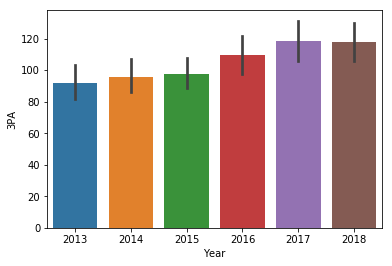

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='Year', y='3PA', data=df)

In [0]:
# ordena DataFrame por bola de 3 pontos convertidas em ordem decrescente
sorted_df = df.sort_values(by=['3P'], axis=0, ascending=False)

# mostra 5 primeiras posições da tabela
sorted_df[['Player', '3P', 'Year']].head()

,Player,3P,Year
121,Stephen Curry,402,2016
124,Stephen Curry,324,2017
140,Stephen Curry,286,2015
123,Stephen Curry,272,2013
542,Klay Thompson,268,2017


In [29]:
# agrupando os dados por jogador e somando os valores
grouped_df = df.groupby('Player', as_index=False).sum()

#ordena Data Frame por bolas de 3 pontos convertidas em ordem decrescente
sorted_df = grouped_df.sort_values(by=['3P'], axis=0, ascending=False)

#mostra 5 primeiras posições da tabela
cinco_primeiros = sorted_df[['Player', '3P', '3PA']].head()
cinco_primeiros

,Player,3P,3PA
794,Stephen Curry,1496,3422
369,James Harden,1327,3659
531,Kyle Korver,1241,2746
518,Klay Thompson,1170,2774
170,Damian Lillard,1051,2893


In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

In [0]:
# salvando informações
df.to_csv('/gdrive/My Drive/Colab Notebooks/Datasets/basketball_reference.csv')

In [0]:
# salvando informações
cinco_primeiros.to_csv('/gdrive/My Drive/Colab Notebooks/Datasets/basketball_reference_final.csv')